# **Table of Contents**
* [ANOVA](#section_10)
    * [One-way](#section_11)
    * [Two-way](#section_12)
    <br><br>
* [Chi-square](#section_13)
    * [Goodness of fit](#section_14)
    * [Independence](#section_15)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import scipy.stats       as stats

import warnings
warnings.simplefilter ('ignore')

<a id='section_10'></a>
# **1. ANOVA**

-  Analysis of Variance
-  Tests the equality of two or more population means by examining the variances of samples that are taken.
-  Tests the general difference ,  rather than specific differences ,  among means. 

### Assumptions

* All populations involved follow a normal distribution
* All populations have the same variance
* The samples are randomly selected and independent of one another


<a id='section_11'></a>
# **1.1 - One-way**

## **Q 1**

Consider the monthly income of members from three different gyms
* Gym 1 (n = 22)
* Gym 2 (n = 18)
* Gym 3 (n = 23)
* Using ANOVA, test whether the    members' mean monthly income     is equal for each Gym.

In [2]:
Gym1  =  np.array  ([60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73]    )
Gym2  =  np.array  ([56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64]                    )
Gym3  =  np.array  ([67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45])  

In [3]:
df  =  pd.DataFrame()

df1     =  pd.DataFrame ( {'Gym': '1' , 'Monthly_inc':Gym1 } )
df2     =  pd.DataFrame ( {'Gym': '2 ', 'Monthly_inc':Gym2 } )
df3     =  pd.DataFrame ( {'Gym': '3' , 'Monthly_inc':Gym3 } )

df  =  df.append (df1) 
df  =  df.append (df2) 
df  =  df.append (df3)

df

,Gym,Monthly_inc
0,1,60
1,1,66
2,1,65
3,1,55
4,1,62
...,...,...
18,3,58
19,3,68
20,3,70
21,3,72


> Comments
    
        * Here we have 3 groups. 
        * ANOVA can determine whether the means of >=3 groups are different. 
        * ANOVA uses F-tests to statistically test the equality of means.

**State the null and alternative hypothesis**

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

## **i. f_oneway**

In [4]:
stats.f_oneway (Gym1, Gym2, Gym3)

F_onewayResult(statistic=0.4970745666663714, pvalue=0.6107903864000767)

* p > 0.05
* Accept Null
* No Significant Difference (SD) between the 3 samples
* No Significant Relation (SR) between Members_MI & Gym_they_go

## **ii. ANOVA table**

* ols  ------------------ creates a model from a formula and dataframe
* anova_lm  ----------- gives an Anova table for one or more fitted linear models
*  ~  separates model's LHS from  RHS

In [5]:
import statsmodels.api           as       sm
from   statsmodels.formula.api   import   ols
 
model          =  ols('Monthly_inc ~ Gym' , data=df)  .fit()

anova_table    =  sm.stats.anova_lm (model , typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Gym,66.614123,2.0,0.497075,0.61079
Residual,4020.370004,60.0,NaN,NaN


* P-value of F_calculated is > 0.05 
* Accept Null

## **iii. Plot**

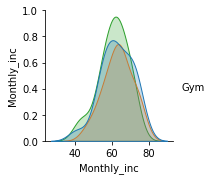

In [6]:
sns.pairplot (df,  diag_kind='kde',  hue='Gym')    ;

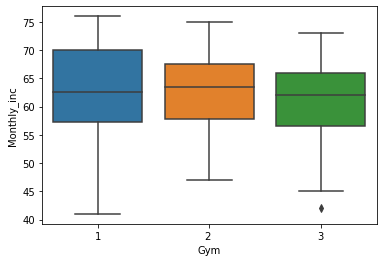

In [7]:
sns.boxplot  (x="Gym",  y="Monthly_inc",  data=df) ;

OBS
*  No SD
*  No SR

## **Q 2**

* Car crash test data.
* Compact , Mid & Full sized cars
* Given data of the pressure exerted on driver's head during a crash test 
* Test whether the means of 3 car categories are same or different , at 5%  significance level.

In [8]:
C    =  np.array ( [643, 655, 702] )
M    =  np.array ( [469, 427, 525] )
F    =  np.array ( [484, 456, 402] )

In [9]:
df = pd.DataFrame()

df1            =  pd.DataFrame ( { 'Car_Type': 'C'  ,  'Mean_Pressure': C } )
df2            =  pd.DataFrame ( { 'Car_Type': 'M'  ,  'Mean_Pressure': M } )
df3            =  pd.DataFrame ( { 'Car_Type': 'F'  ,  'Mean_Pressure': F } )

df = df.append (df1) 
df = df.append (df2) 
df = df.append (df3) 

df

,Car_Type,Mean_Pressure
0,C,643
1,C,655
2,C,702
0,M,469
1,M,427
2,M,525
0,F,484
1,F,456
2,F,402


## **i. f_oneway**

In [10]:
stats.f_oneway ( C , M , F)

F_onewayResult(statistic=25.175411221637088, pvalue=0.0012071270284831192)

> Comments
    
        * P < alpha
        * Reject null
        * SD between the mean pressures of 3 car categories 
        * SR between Car category & Pressure exerted on head

## **ii. ANOVA table**

In [11]:
import statsmodels.api           as      sm
from   statsmodels.formula.api   import  ols
 
model         =  ols ( 'Mean_Pressure ~ Car_Type' , data=df )  .fit()

anova_table   =  sm.stats.anova_lm (model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Car_Type,86049.555556,2.0,25.175411,0.001207
Residual,10254.000000,6.0,NaN,NaN


## **iii. TukeyHSD**

### Post-hoc analysis to determine which means are different 

In [12]:
from  statsmodels.stats.multicomp  import  pairwise_tukeyhsd

print ( pairwise_tukeyhsd ( df["Mean_Pressure"] , df["Car_Type"]  , alpha=0.05 )  )


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     C      F -219.3333 0.0015 -322.7791 -115.8876   True
     C      M    -193.0  0.003 -296.4458  -89.5542   True
     F      M   26.3333 0.7172  -77.1124  129.7791  False
---------------------------------------------------------


## **iv. Plot**

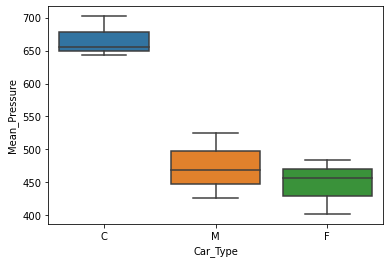

In [13]:
sns.boxplot  ( df['Car_Type'] ,  df['Mean_Pressure'] ) ; 

## **Q 3**

A company makes three types of electronic device.
Life time in hours for each type of electronic device is given below:

In [14]:
LTA  =  np.array ( [407,411,409 ]        )
LTB  =  np.array ( [404,406,408,405,402] )
LTC  =  np.array ( [410,408,406,408]     )

In [15]:
df  =  pd.DataFrame()

df1         =  pd.DataFrame ( {'Type': 'A', 'Life_hours':LTA} )
df2         =  pd.DataFrame ( {'Type': 'B', 'Life_hours':LTB} )
df3         =  pd.DataFrame ( {'Type': 'C', 'Life_hours':LTC} )

df  =  df.append (df1) 
df  =  df.append (df2) 
df  =  df.append (df3) 

df.head()

,Type,Life_hours
0,A,407
1,A,411
2,A,409
0,B,404
1,B,406


## **i. ANOVA table**

In [16]:
import statsmodels.api           as       sm
from   statsmodels.formula.api   import   ols
 
model        =  ols ('Life_hours ~ Type' , data = df)  .fit()

anova_table  =  sm.stats.anova_lm (model , typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Type,36.0,2.0,4.5,0.044194
Residual,36.0,9.0,NaN,NaN


## **ii. Tukey HSD**

In [17]:
from statsmodels.stats.multicomp   import   pairwise_tukeyhsd

print ( pairwise_tukeyhsd ( df ['Life_hours']  ,  df['Type']  ,  alpha=0.1)  )


Multiple Comparison of Means - Tukey HSD, FWER=0.10
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     -4.0 0.0541  -7.422 -0.578   True
     A      C     -1.0 0.7824 -4.5788 2.5788  False
     B      C      3.0 0.1177 -0.1433 6.1433  False
---------------------------------------------------


## **iii. Plot**

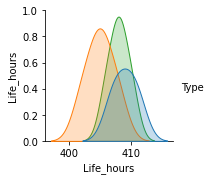

In [18]:
sns.pairplot (df , hue='Type') ;

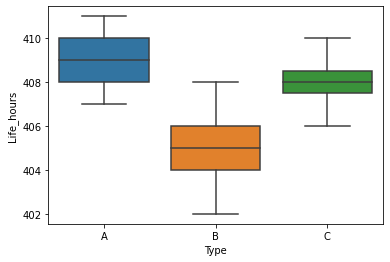

In [19]:
sns.boxplot  (x="Type",  y="Life_hours",  data=df) ;

## **Q 4**

* Given annual return of stocks under different sectors:
* Is there any evidence that the stock return depends on sector ?

In [20]:
C  =  np.array ( [ 0.0632, 0.1473, 0.1195, 0.1236, 0.1028, 0.0381, 0.1015, 0.1106, 0.0629, 0.0515, 
                   0.0844, 0.1428, 0.0889, 0.0598,0.0696, 0.1162, 0.0522, 0.0534, 0.0593, 0.0710,  
                   0.1091, 0.0820, 0.1019, 0.0904, 0.0861, 0.0939, 0.0263, 0.0277, 0.0476, 0.0960 ]
               )



S  =  np.array ( [ 0.1370, 0.0358, 0.0136, 0.1741, 0.1001, 0.1088, 0.1563, -0.0004, 0.1032, 0.0740, 
                   0.1148, 0.0971, 0.1119, 0.0821, 0.0164, 0.0145, 0.1012, 0.1385, -0.1027, 0.0526, 
                   0.1205, 0.0447, 0.0871, 0.0559, 0.1002, 0.0765, 0.1003, 0.0787, 0.0659, 0.1360 ]
               )


I  =  np.array ( [ 0.0674, 0.0711, 0.0569, 0.0248, 0.0542, 0.0800, 0.0255, 0.0834, 0.0499, 0.0339,
                   0.0873, 0.1385, 0.0529, 0.0906, 0.0284, 0.0582, 0.0766, 0.0412, 0.0910, 0.0876, 
                   0.1077, 0.0148, 0.0471, 0.1066, 0.0044, 0.0294, 0.0655, 0.0284, 0.0390, 0.0728 ]
               )

In [21]:
df      =  pd.DataFrame()

df1     =  pd.DataFrame ( { 'Sector': 'Consumer'  ,   'Stock_Return': C } )
df2     =  pd.DataFrame ( { 'Sector': 'Service'   ,   'Stock_Return': S } )
df3     =  pd.DataFrame ( { 'Sector': 'Industrial',   'Stock_Return': I } )



df   =  df.append (df1) 
df   =  df.append (df2) 
df   =  df.append (df3) 


df.head()

,Sector,Stock_Return
0,Consumer,0.0632
1,Consumer,0.1473
2,Consumer,0.1195
3,Consumer,0.1236
4,Consumer,0.1028


## **i. ANOVA table**

In [22]:
import statsmodels.api           as       sm
from   statsmodels.formula.api   import   ols
 
model        =  ols ('Stock_Return ~ Sector' , data = df)  .fit()

anova_table  =  sm.stats.anova_lm (model , typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Sector,0.008719,2.0,2.59173,0.080664
Residual,0.146340,87.0,NaN,NaN


> Comments :
    
    * p > 0.05
    * Accept Null
    * No sig difference in stock returns among 3 sectors
    * No sig relation between stock returns & sectors

## **ii. Tukey HSD**

In [23]:
from statsmodels.stats.multicomp   import   pairwise_tukeyhsd

print ( pairwise_tukeyhsd ( df ['Stock_Return']  ,  df ['Sector']  ,  alpha=0.1)  )


    Multiple Comparison of Means - Tukey HSD, FWER=0.10     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
  Consumer Industrial  -0.0222 0.0975 -0.0442 -0.0001   True
  Consumer    Service  -0.0028    0.9 -0.0249  0.0192  False
Industrial    Service   0.0193 0.1678 -0.0027  0.0413  False
------------------------------------------------------------


## **iii. Plot**

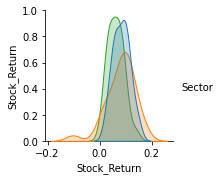

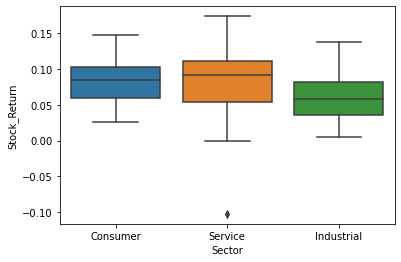

In [24]:
sns.pairplot ( df , hue='Sector')
plt.show()

sns.boxplot  ( x="Sector" ,  y="Stock_Return",  data=df )
plt.show()

<a id='section_12'></a>
# **1.2 - Two-Way**

## **Q 1**

* Table shows Quantity of soaps sold at different Discounts at different Locations.
* This is a two-way ANOVA with replication since the data contains values for multiple locations.
* Test the effects of Discount and Location wrt Qty sold.
---
* Mod : Test the effects of Brand (A,B,C) and Location (1,2) ...... wrt Qty sold

In [25]:
table   = [  ['Loc','Dis0','Dis10','Dis20'], 
             
           [ 1, 20, 28, 32], [ 2, 20, 19, 20], [ 1, 16, 23, 29 ],[ 2, 21, 27, 31 ],
           [ 1, 24, 25, 28 ],[ 2, 23, 23, 35 ],[ 1, 20, 31, 27 ],[ 2, 19, 30, 25 ],
           [ 1, 19, 25, 30 ],[ 2, 25, 25, 31 ],[ 1, 10, 24, 26 ],[ 2, 22, 21, 31 ],
           [ 1, 24, 28, 37 ],[ 2, 25, 33, 31 ],[ 1, 16, 23, 33 ],[ 2, 21, 26, 23 ],
           [ 1, 25, 26, 27 ],[ 2, 26, 22, 22 ],[ 1, 16, 25, 31 ],[ 2, 22, 28, 32 ],
           [ 1, 18, 22, 37 ],[ 2, 25, 24, 22 ],[ 1, 20, 24, 28 ],[ 2, 23, 23, 29 ],
           [ 1, 17, 26, 25 ],[ 2, 23, 26, 25 ],[ 1, 26, 28, 23 ],[ 2, 24, 16, 34 ],
           [ 1, 16, 21, 26 ],[ 2, 20, 30, 30 ],[ 1, 21, 27, 33 ],[ 2, 23, 22, 25 ],
           [ 1, 24, 25, 28 ],[ 2, 18, 16, 39 ],[ 1, 19, 20, 30 ],[ 2, 19, 25, 32 ],
           [ 1, 19, 26, 30 ],[ 2, 19, 34, 29 ],[ 1, 21, 26, 26 ],[ 2, 30, 23, 22 ]     ]

header = table.pop(0)

df     = pd.DataFrame(table, columns=header)

df.head()

,Loc,Dis0,Dis10,Dis20
0,1,20,28,32
1,2,20,19,20
2,1,16,23,29
3,2,21,27,31
4,1,24,25,28


In [26]:
d0   =  df ['Dis0']  .values
d10  =  df ['Dis10'] .values
d20  =  df ['Dis20'] .values
L    =  df ['Loc']   .values
 
df1   =  pd.DataFrame ( {'Loc': L, 'Discount':'0',  'Qty': d0  })
df2   =  pd.DataFrame ( {'Loc': L, 'Discount':'10', 'Qty': d10 })
df3   =  pd.DataFrame ( {'Loc': L, 'Discount':'20', 'Qty': d20 })

df  =  pd.DataFrame()

df  =  df.append (df1) 
df  =  df.append (df2) 
df  =  df.append (df3) 

df.head()

,Loc,Discount,Qty
0,1,0,20
1,2,0,20
2,1,0,16
3,2,0,21
4,1,0,24


> Comments
    
        * Independent categories (factors) 
        * Category 1 - Discount
        * Category 2 - Location
        
> Alternate hypothesis

        * SSD between Category 1  means. 
        * SSD between Category 2  means.
        * Interaction present between  2  Categories

* Two-way ANOVA determines how TargetCol is affected by 2 factors 

## **i. ANOVA table**

* statsmodels.formula.api.ols --------- creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm ------- gives an Anova table for one or more fitted linear models

In [27]:
import statsmodels.api           as      sm
from   statsmodels.formula.api   import  ols
from   statsmodels.stats.anova   import  anova_lm

formula      =  'Qty ~ Discount + Loc + Discount:Loc'                  # Two-way anova
model        =   ols      (formula, df)  .fit()
anova_table  =   anova_lm (model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
Discount,1240.316667,2.0,39.279968,1.055160e-13
Loc,7.008333,1.0,0.443898,5.065930e-01
Discount:Loc,84.816667,2.0,2.686085,7.246036e-02
Residual,1799.850000,114.0,NaN,NaN


## **ii. TukeyHSD**

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print ( pairwise_tukeyhsd ( df['Qty'] , df['Discount'] , alpha=0.05 ) )


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
     0     10    3.925 0.001 1.7904  6.0596   True
     0     20    7.875 0.001 5.7404 10.0096   True
    10     20     3.95 0.001 1.8154  6.0846   True
--------------------------------------------------


>  OBS
* P (Discount) < alpha ----------------------- reject null ---------------------- SR between Discount & Qty sold.
* P (Location) > alpha ----------------------- Accept null ------------------- No SR between Location & Qty sold.
* P (Interaction = 0.0725)  > alpha ---------- Accept null ------------------- No Interaction between Discount & Location.

## **iii. Plot**

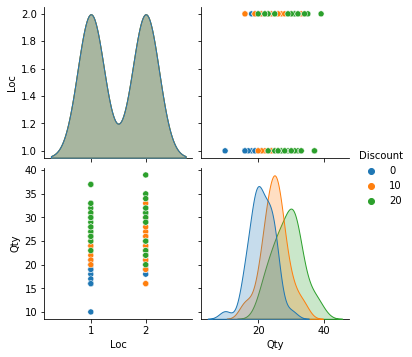

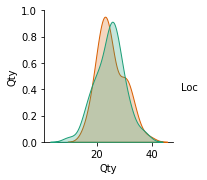

In [29]:
sns.pairplot ( df , diag_kind='kde' , hue='Discount' )  ;
sns.pairplot ( df , diag_kind='kde' , hue='Loc' , palette='Dark2') ;

OBS
* SR between Qty sold & Discount
* No SR between Qty sold & Location

## **Q 2**

The table below shows the percentage of customers satisfied with the quality of service (QoS) offered by a company.

Conduct a two-way ANOVA and draw your inferences about the population means of QoS corresponding to the days as well as the stores.


In [30]:
table  = [ ['Day','Store-A','Store-B','Store-C','Store-D','Store-E'] , 
            
            [1, 79, 81, 74, 77, 66],
            [2, 78, 86, 89, 97, 86], 
            [3, 81, 87, 84, 94, 82], 
            [4, 80, 83, 81, 88, 83], 
            [5, 70, 74, 77, 89, 68]    ]


header  =  table.pop(0) 

df      =  pd.DataFrame (table , columns=header)
df

,Day,Store-A,Store-B,Store-C,Store-D,Store-E
0,1,79,81,74,77,66
1,2,78,86,89,97,86
2,3,81,87,84,94,82
3,4,80,83,81,88,83
4,5,70,74,77,89,68


In [31]:
day  =  df ['Day']    .values
SA   =  df ['Store-A'].values
SB   =  df ['Store-B'].values
SC   =  df ['Store-C'].values
SD   =  df ['Store-D'].values
SE   =  df ['Store-E'].values

df1     =   pd.DataFrame ({ 'Day': day , 'Store':'A' , 'QoS': SA })
df2     =   pd.DataFrame ({ 'Day': day , 'Store':'B' , 'QoS': SB })
df3     =   pd.DataFrame ({ 'Day': day , 'Store':'C' , 'QoS': SC })
df4     =   pd.DataFrame ({ 'Day': day , 'Store':'D' , 'QoS': SD })
df5     =   pd.DataFrame ({ 'Day': day , 'Store':'E' , 'QoS': SE })

df  =  pd.DataFrame()

df  =  df.append (df1) 
df  =  df.append (df2) 
df  =  df.append (df3) 
df  =  df.append (df4) 
df  =  df.append (df5) 

df.head()

,Day,Store,QoS
0,1,A,79
1,2,A,78
2,3,A,81
3,4,A,80
4,5,A,70


### Factors : 
* 1 - Day 
* 2 - Store

### Alternate hypothesis:

*  SSD between Factor 1  means. 
*  SSD between Factor 2  means.
*  Interaction present between  2  Factors

### Note
* Two-way ANOVA determines how TargetCol is affected by 2 factors 
* Here we use 2-way ANOVA without replication since each cell has only one observation.

## **i. ANOVA table**

In [32]:
import statsmodels.api          as      sm
from   statsmodels.formula.api  import  ols
from   statsmodels.stats.anova  import  anova_lm

formula      =   'QoS ~ Day + Store'
model        =   ols      (formula , df)   .fit()
anova_table  =   anova_lm (model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
Store,461.76,4.0,2.456775,0.080773
Day,7.22,1.0,0.153655,0.699429
Residual,892.78,19.0,NaN,NaN


## **ii. Tukey HSD**

In [33]:
from  statsmodels.stats.multicomp   import   pairwise_tukeyhsd

print ( pairwise_tukeyhsd ( df["QoS"] , df["Day"] , alpha=0.05 ) )


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2     11.8 0.0437   0.2531 23.3469   True
     1      3     10.2 0.0997  -1.3469 21.7469  False
     1      4      7.6 0.3156  -3.9469 19.1469  False
     1      5      0.2    0.9 -11.3469 11.7469  False
     2      3     -1.6    0.9 -13.1469  9.9469  False
     2      4     -4.2 0.7885 -15.7469  7.3469  False
     2      5    -11.6 0.0486 -23.1469 -0.0531   True
     3      4     -2.6    0.9 -14.1469  8.9469  False
     3      5    -10.0 0.1101 -21.5469  1.5469  False
     4      5     -7.4 0.3406 -18.9469  4.1469  False
-----------------------------------------------------


>  OBS
* P (Discount) < alpha ----------------------- reject null ---------------------- SR between Discount & Qty sold.
* P (Location) > alpha ----------------------- Accept null ------------------- No SR between Location & Qty sold.
* P (Interaction = 0.0725)  > alpha ---------- Accept null ------------------- No Interaction between Discount & Location.

## **iii. Plot**

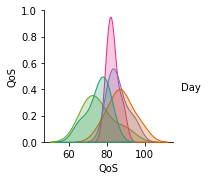

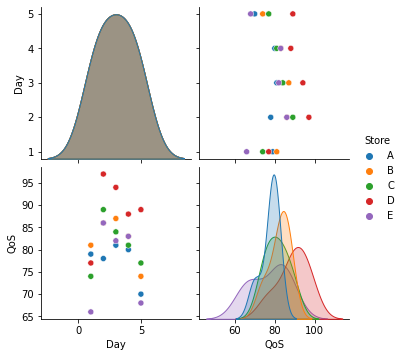

In [34]:
sns.pairplot ( df , diag_kind='kde' , hue='Day' , palette='Dark2')  ; 
sns.pairplot ( df , diag_kind='kde' , hue='Store')  ; 

<a id='section_13'></a>
# **2. Chi-square**

<a id='section_14'></a>
# **2.1 - Goodness of fit test**

* checks whether a data follows a specific probability distribution.
* These are hypothesis tests  used to compare  observed distribution with expected distribution of the data to decide whether there is any SD between them 

This test is invalid when the observed or expected frequencies in each category are too small. <br> A typical rule is that all of the observed and expected frequencies should be at least 5.

| Hypothesis | Description                                                           |
| ----------- | -------------------------------------------------------------------- |
| Null hypothesis | There is no statistically significant difference between the observed frequencies and the expected frequencies from a hypothesized distribution |
| Alternative hypothesis | There is statistically significant difference between the observed frequencies and the expected frequencies from a hypothesized distribution |


## **Q 1**

A1 airlines operated daily flights to several Indian cities. The operations manager believes that 30% of their passengers prefer vegan food, 45% prefer vegetarian food , 20% prefer non-veg food 5% request for Jain food. 

A sample of 500 passengers was chosen to analyse the food preferences and the data is shown in the following table:

|               | Food type | Vegan | Vegetarian | Non-Vegetarian | Jain |
| ------------------------- | ---- | ---- | ----- | ---- | ---- |
|Number of passengers |  | 190 | 185 | 90 | 35 |

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

* $H_0$ : Meal preference is as per the perceived ratios of the operations manager
                        
* $H_A$ : Meal preference is different from the perceived ratios of the operations manager

<a id='section_1'></a>
## i. **P value**

In [35]:
OBS    =  np.array ( [190, 185, 90, 35] )

n      =  OBS.sum()

EXP    =  np.array ( [0.30*n ,  0.45*n ,  0.20*n ,  0.05*n] )

In [38]:
stats.chisquare  (OBS , EXP)

Power_divergenceResult(statistic=22.77777777777778, pvalue=4.492718590376291e-05)

> Comments :

        * p < alpha
        * Reject Null
        * SD between OBS & EXP

## **Q 2**

Blood group of patients of the hospital is given below:
* Expected percentage

| Blood group | Count |
| ------ | --- |
| O | 44%|
| A | 45% |
| B | 8% |
| AB | 3% |


* Observed frequency

| Blood group | Count |
| ----- | ----|
| O | 67 |
| A | 83 |
| B | 29 |
| C | 8 |

At 5% significance level , do you have evidence to conclude that there are differences in the distribution of blood groups among patients that is expected as per our prior knowledge.



In [39]:
obs =  np.array ( [67,83,29,8] )

n   =  obs.sum()

exp =  np.array ( [n*.44 , n*.45 , n*.08 , n*.03] )

stats.chisquare ( obs , exp )

Power_divergenceResult(statistic=17.04810133419759, pvalue=0.000690824622923825)

> Comments :

        * p < alpha
        * Reject Null
        * SD in dist of blood groups of patients

<a id='section_15'></a>
# **2.2 - Independence test**

This is a hypothesis test in which we test whether two or more groups are statistically independent or not.

| Hypothesis | Description |
| --------------------- | ----------------------- |
| Null Hypothesis | Two or more groups are independent |
| Alternative Hypothesis | Two or more groups are dependent |

## **Q 1**

The table below contains the number of perfect, satisfactory and defective products  manufactured by male and female.

| Gender  | Perfect | Satisfactory | Defective |
| ------- | ---- | --------- | -------- |
| Male    | 138 | 83 | 64 |
| Female  | 64 | 67 | 84 |


Do this data provide sufficient evidence at 5% significance level to infer that there are differences in manufacturing quality wrt Gender ?

In [40]:
table  =  np.array ( [ [138, 83, 64] , [64, 67, 84] ] )

In [41]:
stats.chi2_contingency (table)

(22.152468645918482, 1.547578021398957e-05, 2, array([[115.14,  85.5 ,  84.36],
        [ 86.86,  64.5 ,  63.64]]))

> Comments :

        * P (1.5 e-05) < alpha
        * Reject Null
        * SD in Quality wrt Gender
        * SR between Quality & Gender

## **Q 2**

A Cable service provider company is interested in checking whether or not the customer churn depends on customer segment.  Use 5% as level of significance

| Customer Segment | Churned | Retained |
|  -------- | ----- | ---- |
| S1 | 15 | 142 |
| S2 | 24 | 400 |
| S3 | 30 | 389 |


In [42]:
table  =  np.array ( [ [15,142] , [24,400] , [30,389] ] )

In [43]:
stats.chi2_contingency (table)

(2.779977047087869, 0.24907816314986156, 2, array([[ 10.833, 146.167],
        [ 29.256, 394.744],
        [ 28.911, 390.089]]))

> Comments :

        * P (0.24) > alpha
        * Accept null
        * No SD in Churn wrt Segment
        * No SR between Churn & Segment
---

## **Q 3**

**The shift quality data is given below:**

| Shift | Perfect | Satisfactory | Defective |
| ---- | ----- | ----- | ----- |
| I | 106 | 124 | 1 | 
|II |  67 | 85 | 1 |
| III | 37 | 72 | 3 |

At 5% SL do you have evidence to conclude that there are differences in quality among the three shifts?


In [44]:
table  =  np.array ( [ [106,124,1] , [67,85,1] , [37,72,3] ] )

In [45]:
stats.chi2_contingency (table)

(8.646695992462913,
 0.07056326693766583,
 4,
 array([[ 97.80241935, 130.86895161,   2.32862903],
        [ 64.77822581,  86.67943548,   1.54233871],
        [ 47.41935484,  63.4516129 ,   1.12903226]]))

> Comments :
    
        * p (0.07) > alpha
        * Accept Null
        * No SD among the 3 shifts
        * No SR between shift & feedback